<a href="https://colab.research.google.com/github/davidzeng21/ddls-2024/blob/main/ddls_2024_module3_computer_lab_train_crf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Lab 3:Training a Conditional Random Field (CRF) for RiPP Detection 🐉

Welcome to the practical session of [Data-Driven Life Sciences course module 3](https://ddls.aicell.io/course/ddls-2024/module-3/lab/), created by [Laura Carroll](https://www.umu.se/personal/laura-carroll/), with modifications from Professor Wei Ouyang, teaching assistants Songtao Cheng, and Nils Mechtel.

## Background

### 🦠 Microbial Secondary Metabolites and Their Impact on Human Health

Microbes are capable of producing a wide array of **secondary metabolites**, which allow them to interact with each other, as well as with their environment more generally. Secondary metabolites aren't directly involved in the growth, development, or reproduction of the microbes that produce them; however, these compounds allow microbes to respond to stressors and stimuli in their environment, giving them a selective advantage over other microbes in their ecological niche.

Beyond their ecological functions, microbial secondary metabolites play important roles in human health. Some secondary metabolites, for example, are toxic to humans (e.g., [colibactin](https://www.nature.com/articles/s41586-020-2080-8), a genotoxic secondary metabolite produced by *Escherichia coli* and other Enterobacteriaceae, which has been linked to colorectal cancer; [cereulide](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4500953/), a toxin produced by some *Bacillus cereus* group strains, which is a leading cause of foodborne illness; [aflatoxins](https://www.sciencedirect.com/science/article/pii/S0308814623023932?via%3Dihub), which are carcinogenic, immunosuppressive, genotoxic, and mutagenic mycotoxins produced primarily by *Aspergillus* spp.). Other secondary metabolites, however, have important uses in medicine and industry (e.g., [antibiotics](https://www.nature.com/articles/s41570-021-00313-1), such as penicillin, streptomycin, fosfomycin, bacitracin, clavulanic acid; [anticancer drugs](https://www.nature.com/articles/s41417-023-00715-x), such as bleomycin and mitomycin C).

Overall, regardless of whether they're really good or really bad for human helth...**we have a big incentive to discover novel microbial secondary metabolites!**


### 🥊 Machine Learning for Discovering Biosynthetic Gene Clusters (BGCs)

Until recently, microbial secondary metabolite discovery was costly and low-throughput. However, as [the number of publicly available microbial genomes explodes](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7779008/), we can now mine microbial (meta)genomes for the genomic determinants of secondary metabolism! Specifically, bioinformatic tools for novel secondary metabolite discovery make use of a simple observation: that the enzymatic machinery responsible for microbial secondary metabolism is encoded by physically clustered groups of genes called **biosynthetic gene clusters (BGCs)**. Thus, by mining microbial (meta)genomes for novel BGCs, we can hopefully find novel secondary metabolites.

The most popular BGC mining methods are [rule-based approaches](https://academic.oup.com/nar/article/51/W1/W46/7151336), which use hard-coded, manually curated sets of "rules" to determine if a BGC is present in a microbial genome or not. However, in recent years, [machine learning (ML) approaches](https://www.nature.com/articles/s41573-023-00774-7) have been growing in popularity. ML BGC discovery methods assume that certain genomic features (specifically, protein domains) occur inside of a BGC more frequently than outside of it (and vice versa). Based on this assumption, a model is trained to "learn" different protein domain patterns associated with BGC presence/absence from a training data set. The trained model can then be used to detect BGCs in a query genome by calculating the probability that a particular gene or protein domain is part of a BGC or not; genomic regions that surpass a specified BGC probability threshold are predicted to be BGCs.

### 🚀 Let it RiPP! Training a CRF for RiPP detection

[A range of ML models have been trained to detect BGCs in microbial genomes.](https://www.nature.com/articles/s41573-023-00774-7) One such model is the [**conditional random field (CRF)**](https://www.cs.columbia.edu/~jebara/6772/papers/crf.pdf). CRFs are a type of discriminative undirected probabilistic graphical model; they have been used in the natural language processing (NLP) space for years. [Not only are CRFs fast and easy to train, but they are "white-box" models](https://www.biorxiv.org/content/10.1101/2021.05.03.442509v1), meaning that we can use model introspection to look "under the hood" and figure out exactly what they're learning!

In this activity, we are going to train a CRF to detect BGCs associated with the production of [**ribosomally synthesized and post-translationally modified peptides (RiPPs)**](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3954855/), a special subclass of BGCs. Specifically, we are going to re-train [GECCO](https://www.biorxiv.org/content/10.1101/2021.05.03.442509v1), a CRF-based BGC discovery tool, on a set of bacterial genomes, each of which contains one or more known, experimentally validated RiPPs. We will then evaluate the performance of our model on a test set to see how well it performs on novel data it has never seen before. Finally, we will look "under the hood" to see exactly what our CRF is learning.

## Task Introduction


*   🏆 **Goal:** Train a conditional random field (CRF) to detect ribosomally synthesized and post-translationally modified peptides (RiPPs) in bacterial genomes
*   📥 **Input:** Three (3) tab-separated flat text files (`*.tsv`) to be used as input to [GECCO](https://gecco.embl.de/) (i.e., a `*_clusters.tsv`, `*_features.tsv`, and `*_genes.tsv` file; described in detail below)
*   📤 **Output**: A trained GECCO CRF, which can be used to detect RiPPs in bacterial genomes

## Learning Outcomes

*   Train a sequence segmentation model for a genome annotation task
*   Evaluate the performance of a genomic sequence segmentation model
*   Understand (i) how to construct and interpret ROC and PR curves, and (ii) when one might choose one metric over the other








\

---
## 📚 Preparation Task: Understanding Basic Concepts in Microbial Secondary Metabolite Discovery and CRF Training

Before we dive into the practical session, it's essential to ensure that you have a solid understanding of the fundamental concepts that will be used in this computer lab. This will help you follow along more effectively and get the most out of the lab activities. To prepare, please review the following concepts:

#### Key Concepts to Understand:
1. **Secondary Metabolite**: What are secondary metabolites, and why are they important for both microbial ecology and human health?
  
2. **Biosynthetic Gene Cluster (BGC)**: What is a biosynthetic gene cluster, and how does it relate to the production of secondary metabolites? Why are BGCs important in the discovery of new natural products?

3. **Ribosomally Synthesized and Post-Translationally Modified Peptide (RiPP)**: What are RiPPs, and how do they differ from other types of secondary metabolites?

4. **Conditional Random Field (CRF)**: What is a CRF, and how is it used in sequence segmentation tasks? Why is CRF a suitable model for detecting BGCs in microbial genomes?

5. **Sequence Segmentation**: What does sequence segmentation involve, and why is it important in the context of genome annotation and BGC detection?

6. **Training Data and Evaluation Metrics**: What are the key components of training data for a CRF model, and what evaluation metrics (such as ROC and PR curves) are used to assess the performance of sequence segmentation models?

7. **ROC and PR Curves**: What are ROC (Receiver Operating Characteristic) and PR (Precision-Recall) curves? How are they constructed, interpreted, and used to evaluate model performance?

8. **Machine Learning in Genomics**: How are machine learning methods applied to genomic data for secondary metabolite discovery, and what are the advantages and limitations of these approaches compared to traditional rule-based methods?

9. **Genome Annotation**: What is genome annotation, and how does it facilitate the identification of functional elements, such as BGCs, within a genome?

10. **Probabilistic Graphical Models**: What are probabilistic graphical models, and how do they provide insights into the relationships between variables in complex data sets, such as genomic sequences?

**Note**: Some students may not have a bioinformatics background, so it's important to review these concepts thoroughly or seek additional resources if necessary.

#### Pre-Task 1: Create a ChatGPT Prompt to Enhance Your Understanding

**Note:** Feel free to skip this task if you are already familiar with the topics above.

To deepen your understanding of these concepts, we encourage you to construct a well-structured prompt to ask ChatGPT about any of the concepts you're unfamiliar with. A good prompt will help you get a more precise and useful response from the AI.

**Instructions for Crafting Your Prompt:**

1. **Task**: Start your prompt with a clear task that specifies what you want to learn. For example, "Explain the concept of biosynthetic gene clusters (BGCs) and their significance in microbial secondary metabolite discovery."

2. **Context**: Provide background information or specify why you need this knowledge. For example, "I am preparing for a computer lab on training conditional random fields (CRFs) for detecting RiPPs in bacterial genomes and need to understand the role of BGCs in this context."

3. **Exemplars**: If possible, give examples to guide the AI in providing the type of information you're looking for. For example, "Can you also provide an example of how BGCs are used in identifying potential antibiotic compounds?"

4. **Persona**: Specify who you want the AI to be. For example, "Act as a knowledgeable instructor in bioinformatics."

5. **Format**: Specify how you want the information to be presented. For example, "Please provide a brief explanation followed by a real-world example."

6. **Tone**: Indicate the tone of the response. For example, "Explain it in a concise and straightforward manner."

**Example Prompt:**

"Explain the concept of conditional random fields (CRFs) and their application in sequence segmentation tasks within bioinformatics. I am preparing for a computer lab where we will train a CRF to detect RiPP-associated BGCs in bacterial genomes. Act as a knowledgeable instructor in bioinformatics, and please provide a brief explanation followed by a real-world example of CRFs in action."

**Steps:**
1. Review the list of concepts.
2. Identify any concepts you're not familiar with.
3. Construct a ChatGPT prompt using the guidelines above.
4. Ask ChatGPT your prompt and take notes on the response.

### 🌞 Upload your ChatGPT conversation history

After finishing this task, you paste the chat history below. If you're unable to generate a shareable link with ChatGPT, or you used **other large language model product**. You can upload in the [Submission Google Forms](https://forms.gle/mRPab1v3uE52QsDX9).


```
#⭐ Double click to upload your chat history here
#link: https://chatgpt.com/share/babe83b9-11fb-4b09-bc76-91bf5322882a
```

## Practical Activity

### 🌞 If you used ChatGPT to generate code, please upload your chat history here:


```
#⭐ Double click to upload your chat history here
#link: https://chatgpt.com/share/babe83b9-11fb-4b09-bc76-91bf5322882a
```


Note: If you're unable to generate a shareable link with ChatGPT, or you used other large language model product. You can upload in the [Submission Google Forms](https://forms.gle/mRPab1v3uE52QsDX9).

### 📋 Download the training data



1.   To re-train [GECCO's CRF](https://gecco.embl.de/) for a RiPP detection task, we first need 🥁...actual training data! More specifically, we need to show GECCO (i) examples of what real RiPPs look like (i.e., positive training instances), as well as (ii) examples of what real RiPPs DO NOT look like (i.e., negative training instances), so our CRF can learn to differentiate the two.

    We need to supply our training data to GECCO in the form of three (3) tab-separated (TSV; `*.tsv`) files:

    File #1: **clusters.tsv**: A TSV file containing your positive training instances (in our case, [experimentally validated RiPPs from the MIBiG database](https://mibig.secondarymetabolites.org/), with one per line); the file contains four (4) columns: (i) the ID of the contig harboring the RiPP, (ii) the unique ID of the RiPP (from MIBiG), (iii) the starting coordinate of the RiPP in the contig, (iv) the end coordinate of the RiPP in the contig.

    File #2: **genes.tsv**: A TSV file containing the genes detected in each contig in the training data set, with one line per gene; the file contains five (5) columns: (i) the contig ID, (ii) the gene ID, the (iii) start and (iv) end coordinate of the gene in the contig, (v) the strand on which the gene is located.

    File #3: **features.tsv**: A TSV file containing the features (in our case, [protein domains from the Pfam database](https://www.ebi.ac.uk/interpro/)) detected in each contig, with one line per feature (protein domain); the file contains 11 columns: (i) the contig ID, (ii) the gene ID, the (iii) start and (iv) end coordinate of the gene in the contig, (v) the strand on which the gene is located, (vi) the protein domain ID, (vii) the name of the profile hidden Markov model (HMM) used to detect the protein domain, (viii) the protein domain i_evalue (produced by [pyhmmer](https://academic.oup.com/bioinformatics/article/39/5/btad214/7131068)), (ix) the protein domain P-value (produced by [pyhmmer](https://academic.oup.com/bioinformatics/article/39/5/btad214/7131068)), the (x) start and (xi) end coordinate of the protein domain in the gene.

    Training data can require a lot of effort to prepare...but luckily for us, we already have some prepared!

    Let's start by downloading `clusters.tsv`:

In [ ]:
!wget -P /content/ https://zenodo.org/records/13259507/files/clusters.tsv

--2024-09-11 14:36:42--  https://zenodo.org/records/13259507/files/clusters.tsv
Resolving zenodo.org (zenodo.org)... 188.184.103.159, 188.184.98.238, 188.185.79.172, ...
Connecting to zenodo.org (zenodo.org)|188.184.103.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9804 (9.6K) [application/octet-stream]
Saving to: ‘/content/clusters.tsv.1’

clusters.tsv.1      100%[===================>]   9.57K  --.-KB/s    in 0s      

2024-09-11 14:36:43 (122 MB/s) - ‘/content/clusters.tsv.1’ saved [9804/9804]



Let's take a look at the first few lines of `clusters.tsv`:

In [ ]:
!head /content/clusters.tsv

sequence_id	cluster_id	start	end
1141647.SAMD00050603.BDCT01000007	BGC0000468	116159	133739
1144343.SAMN00839654.AKIZ01000038	BGC0000470	131034	157955
1144548.SAMN05443287.FNYV01000008	BGC0000471	107334	120304
1150298.SAMEA3545257.CYYV01000001	BGC0000472	168368	182076
1150468.SAMD00061049.AP012334	BGC0000473	896319	910172
1150626.SAMEA2272023.CAHP01000001	BGC0000474	159284	171884
115433.SAMN05421835.FORP01000004	BGC0000475	185510	198203
1156395.SAMN05251087.MAGO01000001	BGC0000476	225510	225752
1156937.SAMEA2682029.LM997411	BGC0000477	1217812	1228885


We can see that `clusters.tsv` is a tab-separated file with 4 columns; each line corresponds to a contig (`sequence_id`). Each contig contains one or more experimentally validated RiPPs from the MIBiG database (`cluster_id`), located within the contig at coordinates listed in columns `start` and `end`. Regions of each contig that are NOT listed in the file are considered to be negative training instances (i.e., non-RiPP regions).

2.   Now, let's download `genes.tsv`:



In [ ]:
!wget -P /content/ https://zenodo.org/records/13259507/files/genes.tsv

--2024-09-11 14:36:43--  https://zenodo.org/records/13259507/files/genes.tsv
Resolving zenodo.org (zenodo.org)... 188.184.103.159, 188.184.98.238, 188.185.79.172, ...
Connecting to zenodo.org (zenodo.org)|188.184.103.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11021109 (11M) [application/octet-stream]
Saving to: ‘/content/genes.tsv.1’

genes.tsv.1         100%[===================>]  10.51M  1.07MB/s    in 11s     

2024-09-11 14:36:54 (982 KB/s) - ‘/content/genes.tsv.1’ saved [11021109/11021109]



And let's print the first few lines of `genes.tsv`:

In [ ]:
!head /content/genes.tsv

sequence_id	protein_id	start	end	strand
1141647.SAMD00050603.BDCT01000007	1141647.SAMD00050603.BDCT01000007_1	1	1569	-
1141647.SAMD00050603.BDCT01000007	1141647.SAMD00050603.BDCT01000007_2	1605	1730	-
1141647.SAMD00050603.BDCT01000007	1141647.SAMD00050603.BDCT01000007_3	1815	2480	-
1141647.SAMD00050603.BDCT01000007	1141647.SAMD00050603.BDCT01000007_4	2547	2759	-
1141647.SAMD00050603.BDCT01000007	1141647.SAMD00050603.BDCT01000007_5	2806	3381	-
1141647.SAMD00050603.BDCT01000007	1141647.SAMD00050603.BDCT01000007_6	3694	4743	+
1141647.SAMD00050603.BDCT01000007	1141647.SAMD00050603.BDCT01000007_7	4793	5146	+
1141647.SAMD00050603.BDCT01000007	1141647.SAMD00050603.BDCT01000007_8	5185	5634	-
1141647.SAMD00050603.BDCT01000007	1141647.SAMD00050603.BDCT01000007_9	5723	7990	-


Here, we can see all of the genes (`protein_id`) detected in all of the contigs (`sequence_id`) in our training data set.

3.   Finally, let's download `features.tsv`:



In [ ]:
!wget -P /content/ https://zenodo.org/records/13259507/files/features.tsv

--2024-09-11 14:36:55--  https://zenodo.org/records/13259507/files/features.tsv
Resolving zenodo.org (zenodo.org)... 188.184.103.159, 188.184.98.238, 188.185.79.172, ...
Connecting to zenodo.org (zenodo.org)|188.184.103.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 151444806 (144M) [application/octet-stream]
Saving to: ‘/content/features.tsv.1’

features.tsv.1       71%[=============>      ] 103.89M  1.17MB/s    eta 33s    ^C


We can see the first few lines of `features.tsv` by running the following:

In [ ]:
!head /content/features.tsv

sequence_id	protein_id	start	end	strand	domain	hmm	i_evalue	pvalue	domain_start	domain_end
1678129.SAMN03569612.CP011834	1678129.SAMN03569612.CP011834_838	868807	870129	+	PF10359	Pfam-v35.0	2.04259153454724e-06	2.04259153454724e-06	40	103
1678129.SAMN03569612.CP011834	1678129.SAMN03569612.CP011834_838	868807	870129	+	PF08654	Pfam-v35.0	5.21432806074309e-06	5.21432806074309e-06	41	85
1678129.SAMN03569612.CP011834	1678129.SAMN03569612.CP011834_838	868807	870129	+	PF14282	Pfam-v35.0	5.06618073702051e-05	5.06618073702051e-05	41	100
1678129.SAMN03569612.CP011834	1678129.SAMN03569612.CP011834_838	868807	870129	+	PF05531	Pfam-v35.0	0.000106759442192113	0.000106759442192113	55	110
1678129.SAMN03569612.CP011834	1678129.SAMN03569612.CP011834_838	868807	870129	+	PF04977	Pfam-v35.0	0.0427145586544416	0.0427145586544416	73	101
1678129.SAMN03569612.CP011834	1678129.SAMN03569612.CP011834_838	868807	870129	+	PF05377	Pfam-v35.0	0.0325241958244463	0.0325241958244463	80	102
1678129.SAMN03569612.CP011834	

Here, we can see all of the protein domains (i.e., features; `domain`) detected in all of the genes (`protein_id`) in our training data set.

Together, these three TSV files (`clusters.tsv`, `genes.tsv`, and `features.tsv`) will be used to re-train GECCO's CRF for RiPP detection.

### 🦎 Install GECCO

4.   Now that we have our training data, let's install [GECCO](https://github.com/zellerlab/GECCO) using pip:

In [ ]:
!pip install gecco-tool==0.9.8



5.   Just for fun, let's print the help screen for GECCO by running the following command:

In [ ]:
!gecco --help

gecco - Gene Cluster Prediction with Conditional Random Fields

Usage:
    gecco [-v | -vv | -q | -qq] [--no-progress-bar] <cmd> [<args>...]
    gecco --version
    gecco --help [<cmd>]

Commands:
    annotate    annotate protein features of one or several contigs.
    convert     convert output for compatibility with other tools
    cv          perform cross validation on a training set.
    help        display the help message of another subcommand.
    predict     predict gene clusters on contigs that have already been annotated.
    run         predict gene clusters from one or several contigs.
    train       train the CRF model on an embedded feature table.

Parameters:
    -h, --help                 show the message for ``gecco`` or
                               for a given subcommand.
    -q, --quiet                silence any output other than errors
                               (-qq silences everything).
    -v, --verbose              increase verbosity (-v is verbose,
   

In our case, we want to run `gecco train`, because we want to train our own CRF.

6.   To print the help page for `gecco train`, run the following:

In [ ]:
!gecco train --help

gecco train - train the CRF model on an embedded feature table.

Usage:
    gecco train --features <table>... [options]

Arguments:
    -f <data>, --features <table>   a domain annotation table, used to
                                    train the CRF model.
    -c <data>, --clusters <table>   a cluster annotation table, used to
                                    extract the domain composition for
                                    the type classifier.
    -g <file>, --genes <file>       a gene table containing the
                                    coordinates of the genes inside
                                    the training sequence.

Parameters:
    -j <jobs>, --jobs <jobs>        the number of CPUs to use for
                                    multithreading. Use 0 to use all
                                    the available CPUs. [default: 0]

Parameters - Output:
    -o <out>, --output-dir <out>    the directory to use for the model
                                    fil

### 🥊 Train a CRF for RiPP Detection

7\. Now it's your turn to train the CRF! Using GECCO, you will need to train the CRF using the `clusters.tsv`, `genes.tsv`, and `features.tsv` files you downloaded earlier.

💡 **Hint:** To train the model, you will need to use the `gecco train` command, please check the output from `!gecco train --help` output carefully and write the code.

In [ ]:
#⭐ write your code here
!gecco train -c /content/clusters.tsv -g /content/genes.tsv -f /content/features.tsv -j 1 -o /content/model


✔ Loading genetable ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5     MiB   100% 0:00:00 0:00:00
✔ Loading genetable ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5     MiB   100% 0:00:00 0:00:00
✔ Loading genetable ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5     MiB   100% 0:00:00 0:00:00
✔ Loading genetable ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5     MiB   100% 0:00:00 0:00:00
✔ Loading genetable ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5     MiB   100% 0:00:00 0:00:00
✔ Loading genetable ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5     MiB   100% 0:00:00 0:00:00
✔ Loading genetable ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5     MiB   100% 0:00:00 0:00:00
✔ Loading genetable ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5     MiB   100% 0:00:00 0:00:00
✔ Loading genetable ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5     MiB   100% 0:00:00 0:00:00
✔ Loading genetable ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5     MiB   100% 0:00:0

With this command, we:

*   Call GECCO, and tell it that we want to train a CRF (`gecco train`)
*   Provide GECCO with the path to our `clusters.tsv` file (`-c /content/crf_train/clusters.tsv`)
*   Provide GECCO with the path to our `genes.tsv` file (`-g /content/crf_train/genes.tsv`)
*   Provide GECCO with the path to our `features.tsv` file (`-f /content/crf_train/features.tsv`)
*   Tell GECCO to use 1 CPU to train the CRF (`-j 1`)
*   Tell GECCO to save our trained model in a directory named `model` (`-o /content/model`)

### 🔎 Detect RiPPs in a test set

8.   Now that we have trained a CRF, let's use our trained CRF to detect RiPPs in a test set! Our test set contains RiPPs our CRF hasn't seen before, embedded in contigs our CRF hasn't seen before (i.e., this data is not included in our training data set).

To do this, we will use the `gecco predict` command; let's print the help screen for `gecco predict`:

In [27]:
!gecco predict --help

gecco predict - predict gene clusters on contigs that have already been annotated.

Usage:
    gecco predict --genome <file> --features <table>... --genes <table> [options]

Arguments:
    -g <file>, --genome <file>    a genomic file containing one or more
                                  sequences to use as input. Must be in
                                  one of the sequences format supported
                                  by Biopython.
    --features <table>            a feature table obtained by a previous
                                  invocation of ``gecco run``.
    --genes <table>               a gene table obtained by a previous
                                  invocation of ``gecco run``.


Parameters:
    -f <fmt>, --format <fmt>      the format of the input file, as a
                                  Biopython format string. GECCO is able
                                  to recognize FASTA and GenBank files
                                  automatically if this

9.   Now we need to download our test set. For this activity, our test set consists of three files:

*   `test_genomes.fna`: the test set contigs on which we want to evaluate our trained model; each contig contains one known RiPP, surrounded by RiPP-negative regions
*   `test_genes_probs.tsv`: a TSV containing all genes detected within our test set contigs (`test_genomes.fna`), and the probability of each gene being part of a RiPP; this was produced by supplying  `test_genomes.fna` and our trained model (`/content/model`) to `gecco run`
*   `test_features_probs.tsv`: a TSV containing all features (protein domains) detected within our test set contigs (`test_genomes.fna`), and the probability of each protein domain being part of a RiPP; this was produced by supplying  `test_genomes.fna` and our trained model (`/content/model`) to `gecco run`

First, let's download `test_genes_probs.tsv`:

In [28]:
!wget -P /content/ https://zenodo.org/records/13259507/files/test_genes_probs.tsv

--2024-09-11 14:50:44--  https://zenodo.org/records/13259507/files/test_genes_probs.tsv
Resolving zenodo.org (zenodo.org)... 188.184.98.238, 188.185.79.172, 188.184.103.159, ...
Connecting to zenodo.org (zenodo.org)|188.184.98.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6421478 (6.1M) [application/octet-stream]
Saving to: ‘/content/test_genes_probs.tsv’

test_genes_probs.ts 100%[===================>]   6.12M  1.16MB/s    in 5.8s    

2024-09-11 14:50:51 (1.05 MB/s) - ‘/content/test_genes_probs.tsv’ saved [6421478/6421478]



And let's view the first few lines of `test_genes_probs.tsv`:

In [29]:
!head /content/test_genes_probs.tsv

sequence_id	protein_id	start	end	strand	average_p	max_p
1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258	1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258_1	583	1656	-	0.0010498219908909694	0.0010498219908909694
1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258	1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258_2	1868	2395	+	0.002616441239389753	0.002616441239389753
1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258	1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258_3	2423	2614	+	0.0024857689224952483	0.0024857689224952483
1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258	1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258_4	2614	3618	+	0.0015729466129330498	0.0015729466129330498
1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258	1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258_5	3605	4504	+	0.0000639662639503426	0.0000639662639503426
1761885

10.   Now let's download `test_features_probs.tsv`:

In [30]:
!wget -P /content/ https://zenodo.org/records/13259507/files/test_features_probs.tsv

--2024-09-11 14:51:52--  https://zenodo.org/records/13259507/files/test_features_probs.tsv
Resolving zenodo.org (zenodo.org)... 188.184.103.159, 188.185.79.172, 188.184.98.238, ...
Connecting to zenodo.org (zenodo.org)|188.184.103.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12646497 (12M) [application/octet-stream]
Saving to: ‘/content/test_features_probs.tsv’

test_features_probs 100%[===================>]  12.06M   989KB/s    in 12s     

2024-09-11 14:52:05 (1004 KB/s) - ‘/content/test_features_probs.tsv’ saved [12646497/12646497]



We can view the first few lines of `test_features_probs.tsv` by running the following:

In [31]:
!head /content/test_features_probs.tsv

sequence_id	protein_id	start	end	strand	domain	hmm	i_evalue	pvalue	domain_start	domain_end	cluster_probability
1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258	1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258_1	583	1656	-	PF02518	Pfam-A	1.185242168958192e-24	1.702934150802e-27	258	356	0.0010498219908909694
1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258	1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258_2	1868	2395	+	PF02620	Pfam-A	2.4988558019964337e-22	3.5903100603397036e-25	59	172	0.002616441239389753
1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258	1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258_3	2423	2614	+	PF01783	Pfam-A	1.1414337141683402e-24	1.6399909686326728e-27	2	56	0.0024857689224952483
1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258	1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258_4	2614	3618	+	PF00108	Pfam-A	9.654601509742354e-9	1.3871553893307

11.   Finally, let's download `test_genomes.fna`:

In [32]:
!wget -P /content/ https://zenodo.org/records/13259507/files/test_genomes.fna

--2024-09-11 14:52:05--  https://zenodo.org/records/13259507/files/test_genomes.fna
Resolving zenodo.org (zenodo.org)... 188.184.103.159, 188.185.79.172, 188.184.98.238, ...
Connecting to zenodo.org (zenodo.org)|188.184.103.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37408505 (36M) [application/octet-stream]
Saving to: ‘/content/test_genomes.fna’

test_genomes.fna    100%[===================>]  35.67M  1.29MB/s    in 32s     

2024-09-11 14:52:38 (1.11 MB/s) - ‘/content/test_genomes.fna’ saved [37408505/37408505]



Again, we can view the first few lines:

In [33]:
!head /content/test_genomes.fna

>1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258
ATGACGTTGATAGGGTGCAGGTGTAAAGACGGTGACGTCAAAGCCGAGCACTACTAATTG
TCCGAGATCTTTCGCTGTATGCTGATATTATCAGATGTAGTTGTTTCTGAAACGGGCTTC
TACTGAGGTTTCTTGTGTCGACAGTGTCAATACCCATATCAGGTGGTTATTGCAGCGGGG
TCCCACCTCTTCCCATTCCGAACAGAGAAGTTAAGCCCGCCTGCGCCGATGGTACTGCAA
TGCAATGCGGGAGAGTAGGAAGCCGCCACTTTTATTTGAGAGCCCTGAATCCGAAAAGGT
TCAGGGCTCTTTCGTTTTGTTACTGAAAATACACCCTGTTGTCCCACGGGAAGCCGTGCT
ATCCTTAGGTAATCCGCCTCTTTTAGAAAATAATCACGGGGTGCATGTGAATACCTGCTG
TTTTTGTGCGGAAGCTGGTTTCTGCGTATGTGCGCAGGTATAGTTGTCAAATCAGCTTTT
TATCCCGCACTTTCCGCACTTCTCACACCTGAGTCGGGTGTAGGAAGTGTGGGAAGTGTG


12.   Now, let's use our trained CRF, `/content/model`. You will also need to use files: `test_genomes.fna`, `test_features_probs.tsv`, `test_genes_probs.tsv`.

💡 **Hint:** Please check the output from `!gecco predict --help` command carefully and write your code.

In [34]:
# ⭐ Write your code here
!gecco predict -g /content/test_genomes.fna \
              --features /content/test_features_probs.tsv \
              --genes /content/test_genes_probs.tsv \
              -j 1 -o /content/test \
              --force-tsv --merge-gbk --model /content/model

✔ Loading genetable ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1     MiB   100% 0:00:00 0:00:00
✔ Loading genetable ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1     MiB   100% 0:00:00 0:00:00
✔ Loading genetable ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1     MiB   100% 0:00:00 0:00:00
✔ Loading genetable ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1     MiB   100% 0:00:00 0:00:00
✔ Loading genetable ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1     MiB   100% 0:00:00 0:00:00
✔ Loading genetable ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1     MiB   100% 0:00:00 0:00:00
✔ Loading genetable ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1     MiB   100% 0:00:00 0:00:00
✔ Loading genetable ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1     MiB   100% 0:00:00 0:00:00
✔ Loading genetable ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1     MiB   100% 0:00:00 0:00:00
✔ Loading genetable ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1     MiB   100% 0:00:0

With this command, we:

*   Call GECCO's `predict` function (`gecco predict`)
*   Provide the path to our test set contigs, in FASTA format (`-g /content/test_genomes.fna`)
*   Provide the path to our test set features (protein domains; `--features /content/test_features_probs.tsv`)
*   Provide the path to our test set genes (`--genes /content/test_genes_probs.tsv`)
*   Tell GECCO how many CPUs to use (`-j 1`)
*   Tell GECCO where to output results (`-o /content/test`)
*   Tell GECCO to produce a TSV output file for all test set contigs, even if it doesn't detect any RiPPs in a contig (`--force-tsv`)
*   Tell GECCO to produce a single GenBank file containing all detected RiPPs (this prevents GECCO from producing lots of small GenBank files; `--merge-gbk`)
*   Provide GECCO with the path to our trained CRF (`--model /content/model`)

13.   Once we're finished, we can look at the first few lines of each of our output files.

First, `test_genomes.clusters.tsv`, which contains all RiPPs our model detected in our test set:

In [35]:
!head /content/test/test_genomes.clusters.tsv

sequence_id	cluster_id	start	end	average_p	max_p	proteins	domains	type
1765057.SAMD00043969.BCMZ01000002___BGC0001493___123263___126074	1765057.SAMD00043969.BCMZ01000002___BGC0001493___123263___126074_cluster_1	123472	126074	0.9982907559948516	0.9998070502096715	1765057.SAMD00043969.BCMZ01000002___BGC0001493___123263___126074_153;1765057.SAMD00043969.BCMZ01000002___BGC0001493___123263___126074_154;1765057.SAMD00043969.BCMZ01000002___BGC0001493___123263___126074_155	PF00733;PF05402;PF13471	Unknown
1768741.SAMN04299413.LSHQ01000030___BGC0001496___171397___180434	1768741.SAMN04299413.LSHQ01000030___BGC0001496___171397___180434_cluster_1	168896	176903	0.9719480281477546	0.9999416628695185	1768741.SAMN04299413.LSHQ01000030___BGC0001496___171397___180434_166;1768741.SAMN04299413.LSHQ01000030___BGC0001496___171397___180434_167;1768741.SAMN04299413.LSHQ01000030___BGC0001496___171397___180434_168;1768741.SAMN04299413.LSHQ01000030___BGC0001496___171397___180434_169;1768741.SAMN04299413.LSHQ01000

Nice, we've detected some RiPPs in our test set!

Let's take a look at the first few lines of `test_genomes.features.tsv`, which contains the features (protein domains) detected within our test set contigs; the very last column shows the probability of each protein domain being part of a RiPP or not:

In [36]:
!head /content/test/test_genomes.features.tsv

sequence_id	protein_id	start	end	strand	domain	hmm	i_evalue	pvalue	domain_start	domain_end	cluster_probability
1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258	1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258_1	583	1656	-	PF02518	Pfam-A	1.185242168958192e-24	1.702934150802e-27	258	356	0.0010498219908909694
1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258	1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258_2	1868	2395	+	PF02620	Pfam-A	2.4988558019964337e-22	3.5903100603397036e-25	59	172	0.002616441239389753
1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258	1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258_3	2423	2614	+	PF01783	Pfam-A	1.1414337141683402e-24	1.6399909686326728e-27	2	56	0.0024857689224952483
1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258	1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258_4	2614	3618	+	PF00108	Pfam-A	9.654601509742354e-9	1.3871553893307

Finally, let's take a look at the first few lines of `test_genomes.genes.tsv`, which contains the genes detected within our test set contigs; the very last column shows the probability of each gene being part of a RiPP or not:

In [37]:
!head /content/test/test_genomes.genes.tsv

sequence_id	protein_id	start	end	strand	average_p	max_p
1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258	1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258_1	583	1656	-	0.0010498219908909694	0.0010498219908909694
1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258	1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258_2	1868	2395	+	0.002616441239389753	0.002616441239389753
1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258	1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258_3	2423	2614	+	0.0024857689224952483	0.0024857689224952483
1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258	1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258_4	2614	3618	+	0.0015729466129330498	0.0015729466129330498
1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258	1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258_5	3605	4504	+	0.0000639662639503426	0.0000639662639503426
1761885

### 🏆 Evaluate CRF performance

14.   Now, the moment of truth: let's evaluate the performance of our CRF!

We'll start by constructing a receiver operating characteristic (ROC) curve, where we plot our model's True Positive Rate (y-axis) and False Positive Rate (x-axis); the larger the area-under-the-curve (AUC)/the closer our AUC is to 1, the better (for comparison, an AUC produced by randomly guessing whether a gene is part of a RiPP or not would be AUC=0.5)!

To construct our ROC curve, we need to provide two metrics:

*   The probability that a gene in our test set is part of a RiPP or not (i.e., the `max_p` column of `test_genomes.genes.tsv`)
*   Whether a gene in our test set is actually part of a RiPP (coded as `1`) or not (coded as `0`); this information is available in a file named `true_clusters.tsv`, which you can download:


In [38]:
!wget -P /content/ https://zenodo.org/records/13259507/files/true_clusters.tsv

--2024-09-11 14:56:07--  https://zenodo.org/records/13259507/files/true_clusters.tsv
Resolving zenodo.org (zenodo.org)... 188.184.103.159, 188.185.79.172, 188.184.98.238, ...
Connecting to zenodo.org (zenodo.org)|188.184.103.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2907563 (2.8M) [application/octet-stream]
Saving to: ‘/content/true_clusters.tsv’

true_clusters.tsv   100%[===================>]   2.77M   964KB/s    in 2.9s    

2024-09-11 14:56:10 (964 KB/s) - ‘/content/true_clusters.tsv’ saved [2907563/2907563]



If we look at the first few lines of `true_clusters.tsv`, we'll see that each of the genes in our test set is listed in the `gene` column, with a column named `is_RiPP` denoting whether a gene is part of a RiPP (`1`) or not (`0`):

In [39]:
!head /content/true_clusters.tsv

gene	start	end	strand	is_RiPP
1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258_1	583	1656	-	0
1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258_2	1868	2395	+	0
1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258_3	2423	2614	+	0
1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258_4	2614	3618	+	0
1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258_5	3605	4504	+	0
1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258_6	4583	5896	+	0
1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258_7	5897	6283	+	0
1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258_8	6331	7422	+	0
1761885.SAMN04487827.FOIV01000003___BGC0001486___433044___444258_9	7486	8586	-	0


15.   Now, let's construct our ROC curve! We'll start by reading our `true_clusters.tsv` file (and printing the first 5 lines, just for fun!):

In [40]:
import pandas as pd

# read true_clusters.tsv
true_clusters = pd.read_csv("/content/true_clusters.tsv", sep="\t", header=0)

# print the first five lines
print(true_clusters.head(5))

                                                gene  start   end strand  \
0  1761885.SAMN04487827.FOIV01000003___BGC0001486...    583  1656      -   
1  1761885.SAMN04487827.FOIV01000003___BGC0001486...   1868  2395      +   
2  1761885.SAMN04487827.FOIV01000003___BGC0001486...   2423  2614      +   
3  1761885.SAMN04487827.FOIV01000003___BGC0001486...   2614  3618      +   
4  1761885.SAMN04487827.FOIV01000003___BGC0001486...   3605  4504      +   

   is_RiPP  
0        0  
1        0  
2        0  
3        0  
4        0  


16.   Now let's read our `test_genomes.genes.tsv` file (and again, just for fun, print the first five lines):

In [42]:
#⭐ Write your code here:
# read test_genomes.genes.tsv
test_set = pd.read_csv("/content/test/test_genomes.genes.tsv", sep="\t", header=0)
# print the first five lines
print(test_set.head(5))

                                         sequence_id  \
0  1761885.SAMN04487827.FOIV01000003___BGC0001486...   
1  1761885.SAMN04487827.FOIV01000003___BGC0001486...   
2  1761885.SAMN04487827.FOIV01000003___BGC0001486...   
3  1761885.SAMN04487827.FOIV01000003___BGC0001486...   
4  1761885.SAMN04487827.FOIV01000003___BGC0001486...   

                                          protein_id  start   end strand  \
0  1761885.SAMN04487827.FOIV01000003___BGC0001486...    583  1656      -   
1  1761885.SAMN04487827.FOIV01000003___BGC0001486...   1868  2395      +   
2  1761885.SAMN04487827.FOIV01000003___BGC0001486...   2423  2614      +   
3  1761885.SAMN04487827.FOIV01000003___BGC0001486...   2614  3618      +   
4  1761885.SAMN04487827.FOIV01000003___BGC0001486...   3605  4504      +   

   average_p     max_p  
0   0.001050  0.001050  
1   0.002616  0.002616  
2   0.002486  0.002486  
3   0.001573  0.001573  
4   0.000064  0.000064  


17. **Sanity check**: As a **sanity check**, let's make sure the genes in `true_clusters.tsv` and `test_genomes.genes.tsv` are in the exact same order (if they aren't we'll have to reorder them).

💡 **Hint:** You may need to use `equals` function from **Pandas**:

In [43]:
# sanity check: test if genes are in same order.
# Extract the gene identifiers from both DataFrames for comparison
true_genes = true_clusters['gene']
predicted_genes =  test_set['protein_id']

#⭐ Write your code here.

# Sanity check: Compare if genes are in the same order
same_order = true_genes.equals(predicted_genes)

# Print the result of the sanity check
if same_order:
    print("Sanity Check Passed: Genes are in the same order.")
else:
    print("Sanity Check Failed: Genes are NOT in the same order.")


Sanity Check Passed: Genes are in the same order.


Nice, it looks like both of our TSVs are ordered identically, so we can move on!

18.   Now, let's create a function, called `plot_roc_curve`, which we can use to draw our ROC curve:

In [44]:
# import required modules and functions
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


# define the function
def plot_roc_curve(true_y, y_prob):

    # calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

19.   Now, let's plot the ROC curve and calculate the AUC:

AUC : 0.9374900618216934


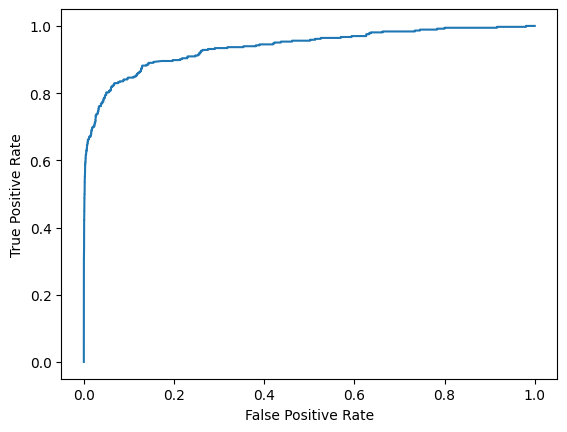

In [45]:
# plot the ROC curve
plot_roc_curve(true_y=true_clusters["is_RiPP"], y_prob=test_set["max_p"])

# calculate the AUC
print(f'AUC : {roc_auc_score(true_clusters["is_RiPP"], test_set["max_p"])}')

That looks AMAZING! Our model looks close to perfect, so we must be done, right?

...not quite. ROC curves are great when we have balanced classes (here, roughly equal numbers of RiPP genes and non-RiPP genes).

20.   How balanced is our dataset? Let's check:

In [46]:
from collections import Counter

Counter(true_clusters["is_RiPP"])

Counter({0: 33103, 1: 364})

OOF! Not very balanced at all...we have tons of 0s (non-RiPP genes), and very few 1s (RiPP genes), so a ROC curve may not provide an accurate assessment of how good (or bad!) our model is.

Let's evaluate our model using a different type of plot: a precision-recall (PR) curve, where we plot our model's Precision (y-axis) and Recall (x-axis); again, the larger the AUC/the closer our AUC is to 1, the better.

To construct our PR curve, we can provide the same two metrics that we used for our ROC curve.

21.   Let's define a function, `plot_pr_curve`, which we can use to construct and plot our PR curve:

💡 **Hint:** you may need to use `precision_recall_curve` and `auc` functions.

In [47]:
# import required modules and functions
from sklearn.metrics import precision_recall_curve, auc


# define plot_pr_curve function
def plot_pr_curve(true_y, y_prob):

    #⭐ Write your code here:
    # construct the PR curve
    precision, recall, thresholds = precision_recall_curve(true_y, y_prob)
    # plot the PR curve
    plt.plot(recall, precision)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    # Print the AUC
    print(f'AUC : {auc(recall, precision)}')

22.   Now let's plot our PR curve:

AUC : 0.6126592982737956


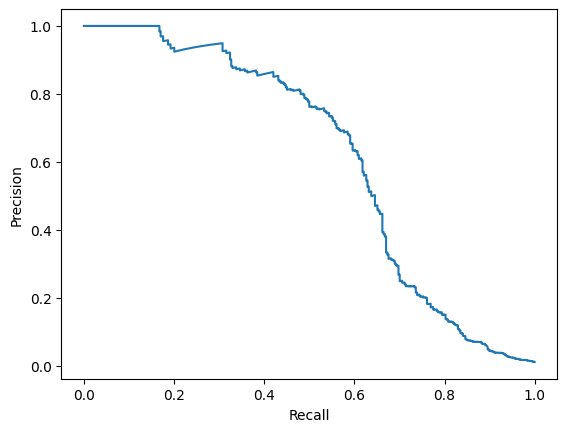

In [48]:
plot_pr_curve(true_y=true_clusters["is_RiPP"], y_prob=test_set["max_p"])

Nice work! Definitely not as impressive as our ROC curve, but not bad at all!

### 🔬 Model introspection

23.   Because CRFs are "white-box" ML models, we can actually see what they're learning! Specifically, our CRF assigned each feature (protein domain) a weight; the higher (more positive) the weight, the more RiPP-associated a protein domain is. The lower (more negative) the weight, the more non-RiPP-associated a protein domain is.

Protein domain weights are stored in the file `model.state.tsv`; let's print the first few lines of `model.state.tsv`:

In [49]:
!head /content/model/model.state.tsv

attr	label	weight
PF04321	0	1.218683
PF01370	0	3.055202
PF16363	0	-0.397626
PF16363	1	0.397626
PF00293	0	2.169062
PF00483	0	0.834746
PF12804	0	1.957941
PF01050	0	0.528681
PF07883	0	-0.323519


24.   Let's look at the most RiPP-associated protein domains to see what our CRF things is important for predicting RiPPs. To do that, we'll read `model.state.tsv`, and sort it by weight (so that the largest domains are first); we'll then print our "top-10" protein domains associated with RiPP detection:

In [50]:
domains = pd.read_csv("/content/model/model.state.tsv", sep="\t", header=0)
domains.sort_values(by=["weight"], ascending=False).head(10)

,attr,label,weight
3353,PF04604,1,8.822356
3125,PF14867,1,8.179600
3326,PF19155,1,8.123746
1513,PF13471,1,6.842296
3539,PF13973,1,6.560476
3343,PF11083,1,6.534147
2061,PF02052,1,6.520900
2063,PF14028,1,6.517052
286,PF09221,1,6.406827
3483,PF10186,1,6.334795


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['weight'].plot(kind='hist', bins=20, title='weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['label']
  ys = series['index']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('label', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('label')
_ = plt.ylabel('index')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['label']
  ys = series['weight']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('label', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('label')
_ = plt.ylabel('weight')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['label']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'label'}, axis=1)
              .sort_values('label', ascending=True))
  xs = counted['label']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('label', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('label')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['weight'].plot(kind='line', figsize=(8, 4), title='weight')
plt.gca().spines[['top', 'right']].set_visible(False)

25.   Which domain is the largest (i.e., the most important protein domain for RiPP prediction)? Copy the protein domain's accession number and search for it in Interpro to get its name and function: https://www.ebi.ac.uk/interpro/search/text/

**🌞 Question:** Does this protein domain seem like it should be important for RiPP detection? Why or why not?


---

`⭐ Protein Domain: PF04604 - Type-A Lantibiotic`

Description: Lantibiotics are antibiotic peptides that include rare thioether amino acids, such as lanthionine or methyl-lanthionine. These peptides are produced by Gram-positive bacteria and are encoded by precursor peptides that undergo post-translational modification to form the mature, active lantibiotic.

* Type-A lantibiotics are flexible and amphiphilic.
* They function by creating pores in bacterial membranes, often interacting with specific molecules like lipid II, a membrane precursor.

PF04604 seems like an important domain for RiPP detection, and here's why:

1. RiPPs (Ribosomally Synthesized and Post-translationally Modified Peptides) undergo significant post-translational modifications to achieve their final functional form. The lantibiotic family fits this description well.

2. Type-A lantibiotics are produced via ribosomal synthesis, which directly links them to the RiPP class of compounds.

3. Since lantibiotics exhibit antimicrobial activity and are gene-encoded, detecting this domain could help identify bacterial genomes that are involved in producing these bioactive compounds.

In conclusion, PF04604 is highly relevant to RiPP detection because lantibiotics are an established subclass of RiPPs, and this domain’s presence indicates a key component in the biosynthesis of these peptides.





---

26.   Finally, let's construct a histogram of all of our protein domain weights:

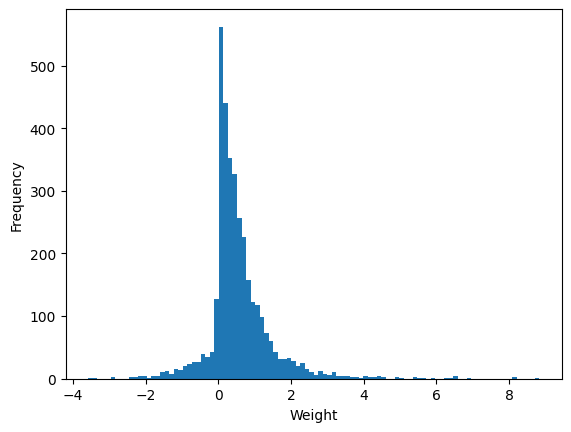

In [51]:
#⭐ Write your code here
# plot histogram
plt.hist(domains["weight"], bins=100)
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.show()

The vast majority of the weights appear to cluster around zero (0); this isn't surprising, as it means that most protein domains in Pfam are not informative for RiPP detection.